In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
                    

In [2]:
df= pd.read_csv("spam.csv",encoding="ISO-8859-1")

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape


(5572, 5)

In [5]:
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [10]:
df.sample(5)

,target,text
2422,ham,A bloo bloo bloo I'll miss the first bowl
1515,ham,I wonder if you'll get this text?
3326,ham,what number do u live at? Is it 11?
1475,ham,Nice. Wait...should you be texting right now? ...
568,ham,Love it! Daddy will make you scream with pleas...


In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
labelencoder = LabelEncoder()
df['target']=labelencoder.fit_transform(df['target'])

In [13]:
df.sample(5)

,target,text
655,0,Tell them the drug dealer's getting impatient
892,0,Nutter. Cutter. Ctter. Cttergg. Cttargg. Ctarg...
2843,0,Today iZ Yellow rose day. If u love my frndshi...
2367,0,V nice! Off 2 sheffield tom 2 air my opinions ...
2334,0,Do you like Italian food?


In [14]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
df.duplicated().sum()

403

In [16]:
df=df.drop_duplicates(keep='first')

In [17]:
df.shape

(5169, 2)

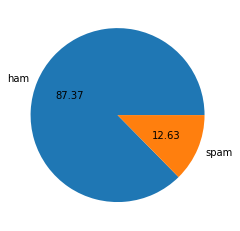

In [18]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct = "%0.2f")
plt.show()

In [19]:
import nltk

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
df['num_charactors']=df['text'].apply(len)

In [22]:
df.sample(5)

,target,text,num_charactors
671,1,SMS. ac sun0819 posts HELLO:\You seem cool,42
2519,0,Ok. I only ask abt e movie. U wan ktv oso?,42
3853,0,oh ya... Got hip hop open. Haha i was thinking...,148
1321,0,"I wake up long ago already... Dunno, what othe...",54
5544,0,"I'm taking derek &amp; taylor to walmart, if I...",154


C:\Users\Administrator\AppData\Local\Temp\ipykernel_7040\320193261.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_word']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [30]:
df['num_word']=df['text'].apply(len)

In [31]:
df.sample(5)

,target,text,num_charactors,SENTANCE_word,num_word
4034,1,YOU ARE CHOSEN TO RECEIVE A å£350 AWARD! Pls c...,159,2,159
4735,0,"Not for possession, especially not first offense",48,1,48
1640,0,"Alright, we're all set here, text the man",41,1,41
4939,0,ÌÏ go home liao? Ask dad to pick me up at 6...,46,2,46
2968,0,Ma head dey swell oh. Thanks for making my day,46,2,46


In [32]:
df['SENTANCE_word']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [33]:
df.sample(6)

,target,text,num_charactors,SENTANCE_word,num_word
945,0,I cant wait to see you! How were the photos we...,59,3,59
263,1,Hey I am really horny want to chat or see me n...,121,1,121
1583,0,"It's cool, let me know before it kicks off aro...",92,1,92
2447,0,Tmr then Ì_ brin lar... Aiya later i come n c ...,109,1,109
1525,0,Pls pls find out from aunt nike.,32,1,32
1313,0,How abt making some of the pics bigger?,39,1,39


In [34]:
df[['num_charactors','num_word','SENTANCE_word']].describe()

,num_charactors,num_word,SENTANCE_word
count,5169.000000,5169.000000,5169.000000
mean,78.977945,78.977945,1.947185
std,58.236293,58.236293,1.362406
min,2.000000,2.000000,1.000000
25%,36.000000,36.000000,1.000000
50%,60.000000,60.000000,1.000000
75%,117.000000,117.000000,2.000000
max,910.000000,910.000000,28.000000


In [35]:
df[df['target']==0][['num_charactors','num_word','SENTANCE_word']].describe()

,num_charactors,num_word,SENTANCE_word
count,4516.000000,4516.000000,4516.000000
mean,70.459256,70.459256,1.799601
std,56.358207,56.358207,1.278465
min,2.000000,2.000000,1.000000
25%,34.000000,34.000000,1.000000
50%,52.000000,52.000000,1.000000
75%,90.000000,90.000000,2.000000
max,910.000000,910.000000,28.000000


In [36]:
df[df['target']==1][['num_charactors','num_word','SENTANCE_word']].describe()

,num_charactors,num_word,SENTANCE_word
count,653.000000,653.000000,653.000000
mean,137.891271,137.891271,2.967841
std,30.137753,30.137753,1.483201
min,13.000000,13.000000,1.000000
25%,132.000000,132.000000,2.000000
50%,149.000000,149.000000,3.000000
75%,157.000000,157.000000,4.000000
max,224.000000,224.000000,8.000000


In [37]:
import seaborn as sns

<AxesSubplot:xlabel='num_charactors', ylabel='Count'>

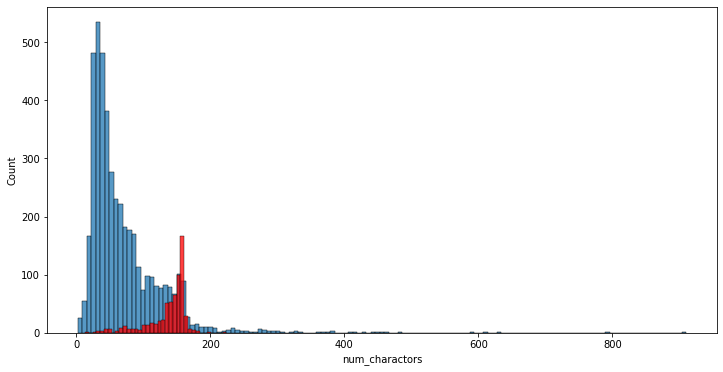

In [38]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_charactors'])
sns.histplot(df[df['target']==1]['num_charactors'],color='red')

<AxesSubplot:xlabel='num_word', ylabel='Count'>

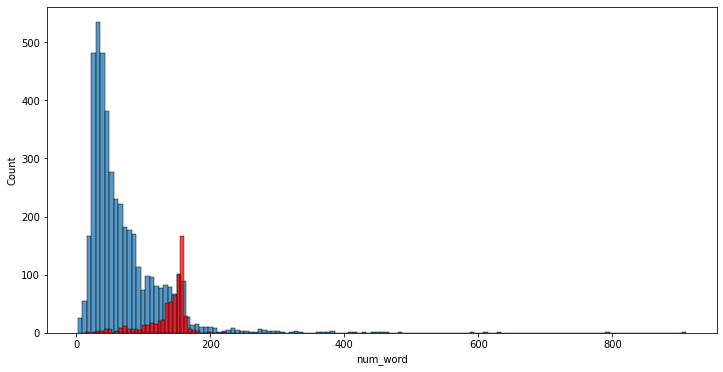

In [39]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_word'])
sns.histplot(df[df['target']==1]['num_word'],color='red')

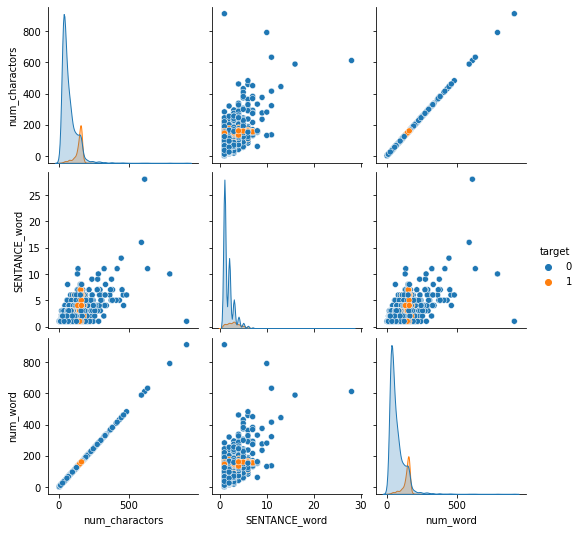

In [40]:
sns.pairplot(df,hue='target')

In [64]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import string
import nltk
nltk.download('stopwords')

def transform_texts(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [65]:
from nltk.stem.porter import PorterStemmer

In [66]:
ps=PorterStemmer()

In [67]:
ps.stem('loving')


'love'

In [69]:
df['transfromd_text']=df['text'].apply(transform_texts)

In [70]:
df.samplee(5)

,target,text,num_charactors,SENTANCE_word,num_word,transfromd_text
4848,0,either way works for me. I am &lt;#&gt; year...,81,3,81,either way work lt gt year old hope doesnt bother
3922,0,Okay lor... Will they still let us go a not ah...,121,3,121,okay lor still let us go ah coz know later dro...
489,0,I think i've fixed it can you send a test mess...,50,1,50,think fix send test messag
5560,0,Anything lor. Juz both of us lor.,33,2,33,anyth lor juz us lor
3280,0,I tot it's my group mate... Lucky i havent rep...,84,1,84,tot group mate lucki havent repli wat time nee...


In [71]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [72]:
cv=CountVectorizer()

In [76]:
tfidf= TfidfVectorizer(max_features=3000)

In [79]:
x=tfidf.fit_transform(df['transfromd_text']).toarray()

In [80]:
x


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [83]:
x.shape

(5169, 3000)

In [84]:
y=df['target'].values

In [82]:
from sklearn.model_selection import train_test_split

In [87]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [90]:
x_test.shape

(1034, 3000)

In [91]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [92]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [93]:
gnb.fit(x_train,y_train)

GaussianNB()

In [102]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [97]:
y_pred1

array([0, 1, 1, ..., 0, 0, 0])

In [104]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [105]:
bnb.fit(x_train,y_train)
y_pred3=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [110]:
pip install xgboost

     -------------------------------------- 125.4/125.4 MB 2.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Administrator\Desktop\Machine_learnigng\tutorial-env\Scripts\python.exe -m pip install --upgrade pip' command.


In [114]:
import xgboost
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [115]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [116]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [117]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [119]:


train_classifier(svc,x_train,y_train,x_test,y_test)



(0.9758220502901354, 0.9747899159663865)

In [121]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9303675048355899
Precision -  0.8367346938775511
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9574468085106383
Precision -  0.8671875
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9477756286266924
Precision -  0.92
For  xgb
Accuracy -  0.971953578336557
Precision -  0.943089430894309


In [122]:
import pickle

In [123]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))